<a href="https://colab.research.google.com/github/esintopaktas/DSA-210/blob/main/Wage_Insurance_Hypothesis_Preprocessing_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data** **Preprocessing**





In [12]:
import pandas as pd


wage_df = pd.read_csv("median_average_wages.csv")
insurance_df = pd.read_csv("health_insurance_coverage.csv")


wage_df = wage_df[(wage_df["year"] >= 2000) & (wage_df["year"] <= 2019)]
insurance_df = insurance_df[(insurance_df["year"] >= 2000) & (insurance_df["year"] <= 2019)]


wage_filtered = wage_df[[
    "year",
    "men_average",
    "women_average",
    "white_men_average",
    "black_men_average"
]]

insurance_filtered = insurance_df[[
    "year",
    "men",
    "women",
    "white_men",
    "black_men"
]]


preprocessed_df = pd.merge(wage_filtered, insurance_filtered, on="year")


preprocessed_df.to_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv", index=False)


# Hypothesis Testing
Null Hypothesis (H₀):

There is no difference in correlation between average hourly wages and health insurance coverage for men compared to women.

Alternative Hypothesis (H₁):

There is a stronger correlation between average hourly wages and health insurance coverage for men compared to women.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

diff_men = df["men_average"] - df["men"]
diff_women = df["women_average"] - df["women"]


t_stat_1, p_two_sided_1 = ttest_ind(diff_men, diff_women, equal_var=False)


p_one_sided_1 = p_two_sided_1 / 2 if t_stat_1 > 0 else 1 - p_two_sided_1 / 2


print("Hypothesis 1: Men > Women (wage-insurance proxy)")
print(f"T-statistic: {t_stat_1:.4f}")
print(f"One-sided p-value: {p_one_sided_1:.4f}")
print("Significant at α = 0.05?", p_one_sided_1 < 0.05)


Hypothesis 1: Men > Women (wage-insurance proxy)
T-statistic: -0.6856
One-sided p-value: 0.7513
Significant at α = 0.05? False


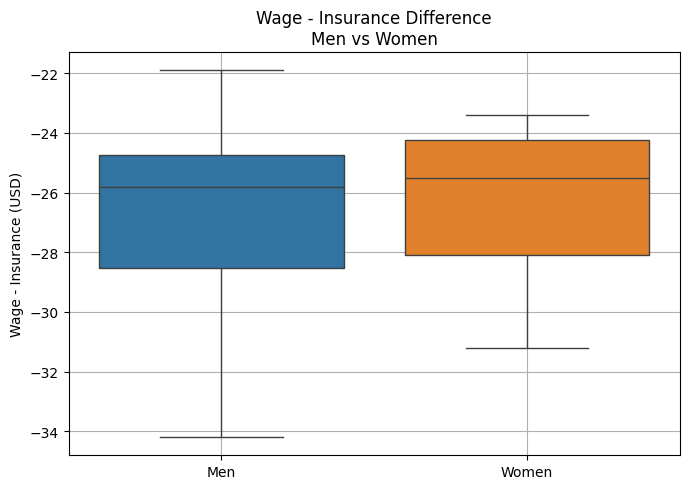

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


df["men_diff"] = df["men_average"] - df["men"]
df["women_diff"] = df["women_average"] - df["women"]


plt.figure(figsize=(7, 5))
sns.boxplot(data=pd.DataFrame({
    "Men": df["men_diff"],
    "Women": df["women_diff"]
}))
plt.title("Wage - Insurance Difference\nMen vs Women")
plt.ylabel("Wage - Insurance (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Null Hypothesis (H₀):

There is no difference in correlation between average hourly wages and health insurance coverage for White men compared to Black men.

Alternative Hypothesis (H₁):

There is a stronger correlation between average hourly wages and health insurance coverage for White men compared to Black men.

In [ ]:

diff_white = df["white_men_average"] - df["white_men"]
diff_black = df["black_men_average"] - df["black_men"]


t_stat_2, p_two_sided_2 = ttest_ind(diff_white, diff_black, equal_var=False)


p_one_sided_2 = p_two_sided_2 / 2 if t_stat_2 > 0 else 1 - p_two_sided_2 / 2


print("Hypothesis 2: White Men > Black Men (wage-insurance proxy)")
print(f"T-statistic: {t_stat_2:.4f}")
print(f"One-sided p-value: {p_one_sided_2:.4f}")
print("Significant at α = 0.05?", p_one_sided_2 < 0.05)


Hypothesis 2: White Men > Black Men (wage-insurance proxy)
T-statistic: -0.8095
One-sided p-value: 0.7880
Significant at α = 0.05? False


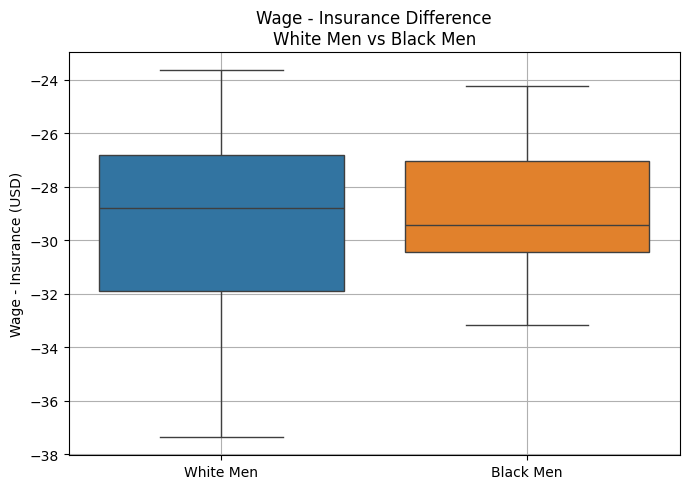

In [ ]:

df["white_diff"] = df["white_men_average"] - df["white_men"]
df["black_diff"] = df["black_men_average"] - df["black_men"]


plt.figure(figsize=(7, 5))
sns.boxplot(data=pd.DataFrame({
    "White Men": df["white_diff"],
    "Black Men": df["black_diff"]
}))
plt.title("Wage - Insurance Difference\nWhite Men vs Black Men")
plt.ylabel("Wage - Insurance (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Data Visualization

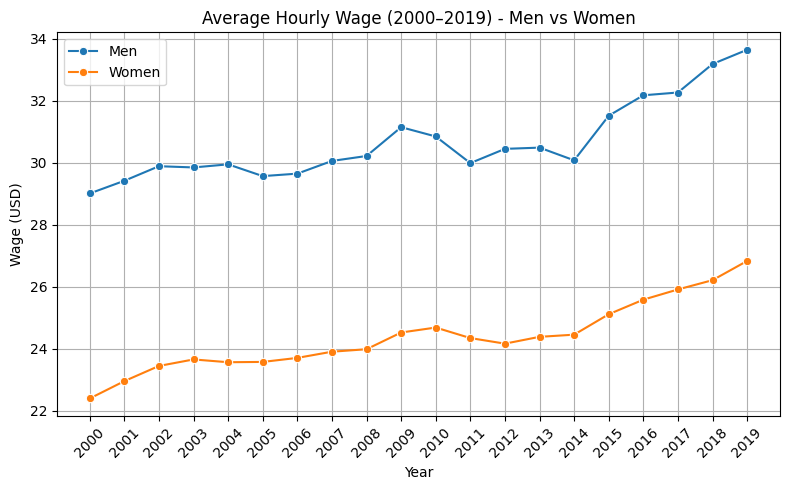

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=wage_df["year"], y=wage_df["men_average"], label="Men", marker="o")
sns.lineplot(x=wage_df["year"], y=wage_df["women_average"], label="Women", marker="o")
plt.title("Average Hourly Wage (2000–2019) - Men vs Women")
plt.xlabel("Year")
plt.ylabel("Wage (USD)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


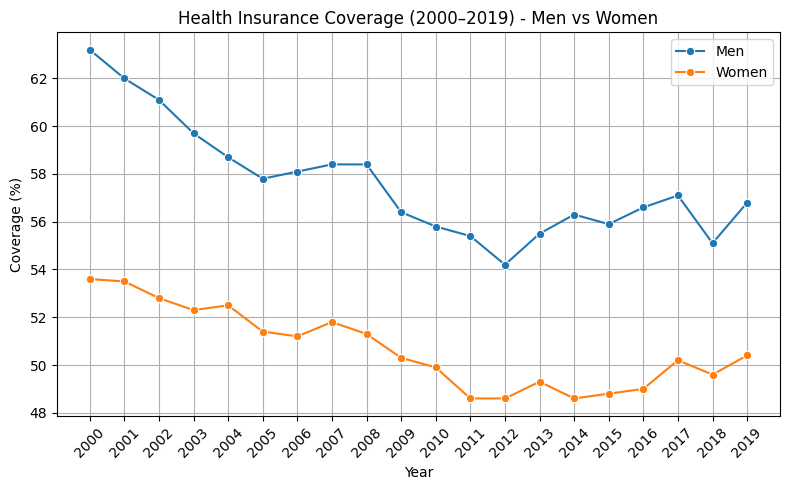

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=insurance_df["year"], y=insurance_df["men"], label="Men", marker="o")
sns.lineplot(x=insurance_df["year"], y=insurance_df["women"], label="Women", marker="o")
plt.title("Health Insurance Coverage (2000–2019) - Men vs Women")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


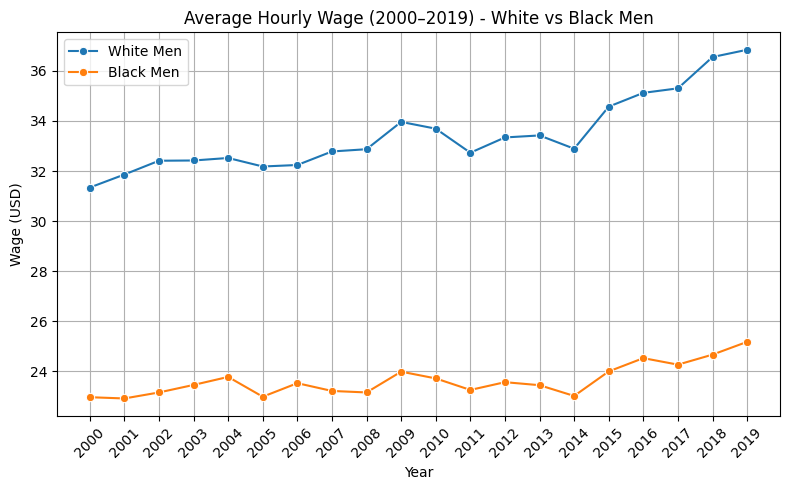

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=wage_df["year"], y=wage_df["white_men_average"], label="White Men", marker="o")
sns.lineplot(x=wage_df["year"], y=wage_df["black_men_average"], label="Black Men", marker="o")
plt.title("Average Hourly Wage (2000–2019) - White vs Black Men")
plt.xlabel("Year")
plt.ylabel("Wage (USD)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


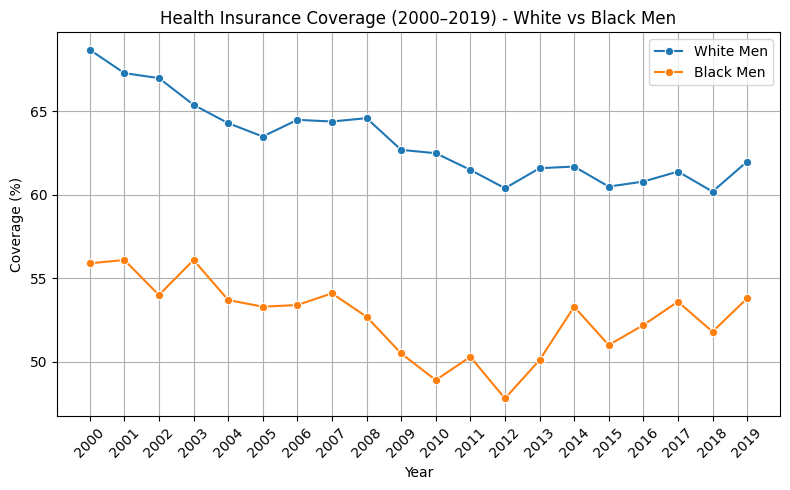

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=insurance_df["year"], y=insurance_df["white_men"], label="White Men", marker="o")
sns.lineplot(x=insurance_df["year"], y=insurance_df["black_men"], label="Black Men", marker="o")
plt.title("Health Insurance Coverage (2000–2019) - White vs Black Men")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Note: AI tools such as ChatGPT and Gemini were used during data cleaning, visualization, and statistical testing phases of this project.

# MACHİNE LEARNİNG TECHNİQUES


# k-Nearest Neighbors (kNN)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


knn_best_model = KNeighborsRegressor(n_neighbors=3)
knn_best_model.fit(X_train, y_train)
y_pred_knn_best = knn_best_model.predict(X_test)


r2_best = r2_score(y_test, y_pred_knn_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_knn_best))


print("KNN Regressor Results (k=3):")
print("R² Score:", round(r2_best, 3))
print("RMSE:", round(rmse_best, 2), "%")

KNN Regressor Results (k=3):
R² Score: 0.32
RMSE: 1.84 %


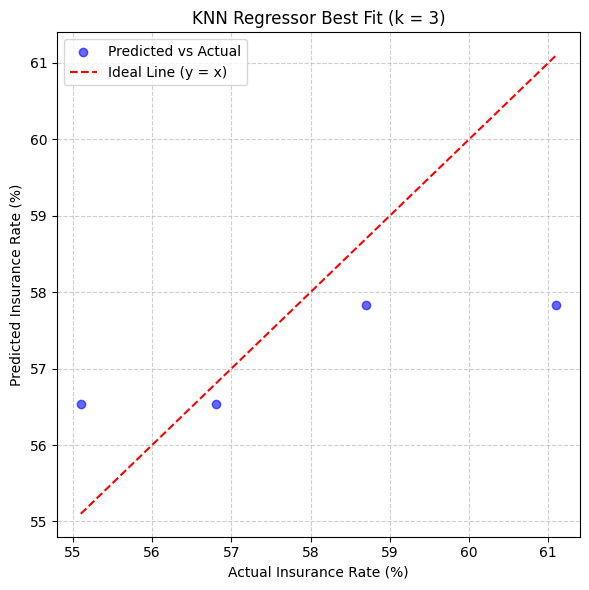

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse


knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (y = x)')
plt.xlabel("Actual Insurance Rate (%)")
plt.ylabel("Predicted Insurance Rate (%)")
plt.title(f"KNN Regressor Best Fit (k = {best_k})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
X = df[['men_average']]
y = df['men']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

print("KNN Regressor Hyperparameter Tuning Results for Men:\n")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_neighbors = {k}")
    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse

print(f"KNN Regressor Results for Men (k={best_k}):")
print(f"R² Score: {best_r2:.3f}")
print(f"RMSE: {best_rmse:.2f} %\n")

KNN Regressor Hyperparameter Tuning Results for Men:

n_neighbors = 1
→ R² Score: 0.150, RMSE: 2.06 %

n_neighbors = 3
→ R² Score: 0.320, RMSE: 1.84 %

n_neighbors = 5
→ R² Score: 0.232, RMSE: 1.96 %

n_neighbors = 7
→ R² Score: 0.310, RMSE: 1.85 %

n_neighbors = 10
→ R² Score: 0.217, RMSE: 1.98 %

n_neighbors = 15
→ R² Score: 0.093, RMSE: 2.13 %

KNN Regressor Results for Men (k=3):
R² Score: 0.320
RMSE: 1.84 %



In [18]:
X = df[['white_men_average']]
y = df['white_men']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

print("KNN Regressor Hyperparameter Tuning Results for White Men:\n")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_neighbors = {k}")
    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse

print(f"KNN Regressor Results for White Men (k={best_k}):")
print(f"R² Score: {best_r2:.3f}")
print(f"RMSE: {best_rmse:.2f} %\n")


KNN Regressor Hyperparameter Tuning Results for White Men:

n_neighbors = 1
→ R² Score: 0.786, RMSE: 1.18 %

n_neighbors = 3
→ R² Score: 0.676, RMSE: 1.45 %

n_neighbors = 5
→ R² Score: 0.533, RMSE: 1.74 %

n_neighbors = 7
→ R² Score: 0.484, RMSE: 1.83 %

n_neighbors = 10
→ R² Score: 0.367, RMSE: 2.03 %

n_neighbors = 15
→ R² Score: 0.149, RMSE: 2.35 %

KNN Regressor Results for White Men (k=1):
R² Score: 0.786
RMSE: 1.18 %



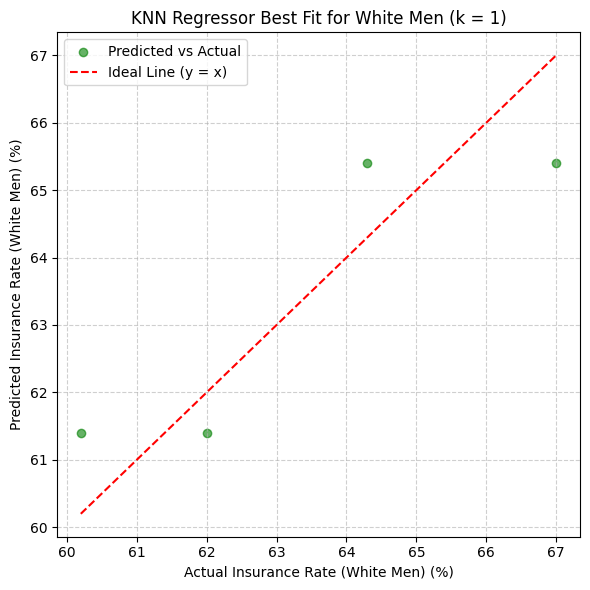

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['white_men_average']]
y = df['white_men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse


knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (y = x)')
plt.xlabel("Actual Insurance Rate (White Men) (%)")
plt.ylabel("Predicted Insurance Rate (White Men) (%)")
plt.title(f"KNN Regressor Best Fit for White Men (k = {best_k})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
X = df[['black_men_average']]
y = df['black_men']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

print("KNN Regressor Hyperparameter Tuning Results for Black Men:\n")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_neighbors = {k}")
    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse

print(f"KNN Regressor Results for Black Men (k={best_k}):")
print(f"R² Score: {best_r2:.3f}")
print(f"RMSE: {best_rmse:.2f} %\n")


KNN Regressor Hyperparameter Tuning Results for Black Men:

n_neighbors = 1
→ R² Score: -7.721, RMSE: 2.62 %

n_neighbors = 3
→ R² Score: -7.484, RMSE: 2.58 %

n_neighbors = 5
→ R² Score: -5.316, RMSE: 2.23 %

n_neighbors = 7
→ R² Score: -3.724, RMSE: 1.93 %

n_neighbors = 10
→ R² Score: -2.397, RMSE: 1.63 %

n_neighbors = 15
→ R² Score: -1.297, RMSE: 1.34 %

KNN Regressor Results for Black Men (k=15):
R² Score: -1.297
RMSE: 1.34 %



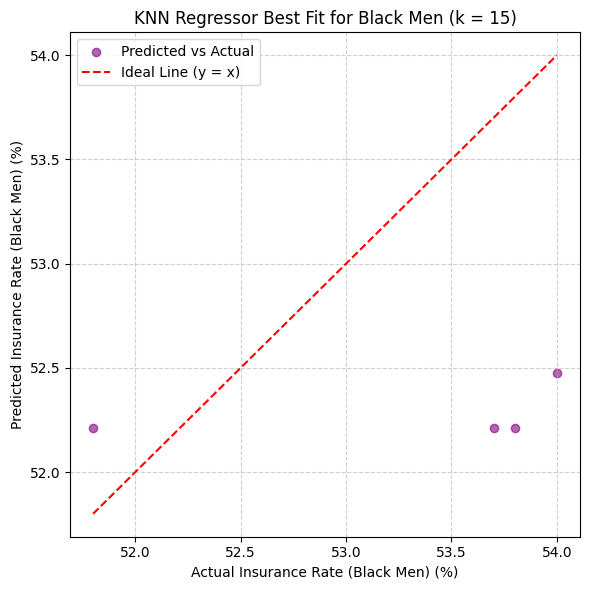

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['black_men_average']]
y = df['black_men']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse


knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='purple', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (y = x)')
plt.xlabel("Actual Insurance Rate (Black Men) (%)")
plt.ylabel("Predicted Insurance Rate (Black Men) (%)")
plt.title(f"KNN Regressor Best Fit for Black Men (k = {best_k})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
X = df[['women_average']]
y = df['women']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

print("KNN Regressor Hyperparameter Tuning Results for Women:\n")

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_neighbors = {k}")
    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse

print(f"KNN Regressor Results for Women (k={best_k}):")
print(f"R² Score: {best_r2:.3f}")
print(f"RMSE: {best_rmse:.2f} %\n")


KNN Regressor Hyperparameter Tuning Results for Women:

n_neighbors = 1
→ R² Score: 0.517, RMSE: 0.94 %

n_neighbors = 3
→ R² Score: 0.550, RMSE: 0.91 %

n_neighbors = 5
→ R² Score: 0.734, RMSE: 0.70 %

n_neighbors = 7
→ R² Score: 0.472, RMSE: 0.99 %

n_neighbors = 10
→ R² Score: -0.200, RMSE: 1.49 %

n_neighbors = 15
→ R² Score: -0.275, RMSE: 1.53 %

KNN Regressor Results for Women (k=5):
R² Score: 0.734
RMSE: 0.70 %



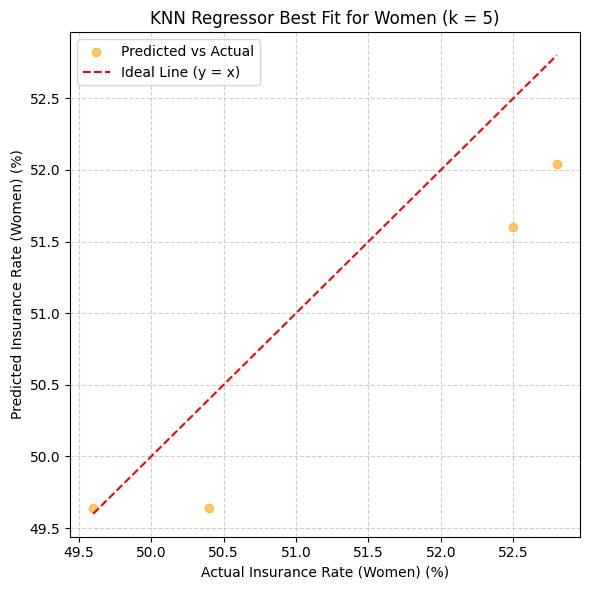

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['women_average']]
y = df['women']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


k_values = [1, 3, 5, 7, 10, 15]
best_k = None
best_r2 = -np.inf
best_rmse = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    if r2 > best_r2:
        best_k = k
        best_r2 = r2
        best_rmse = rmse


knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line (y = x)')
plt.xlabel("Actual Insurance Rate (Women) (%)")
plt.ylabel("Predicted Insurance Rate (Women) (%)")
plt.title(f"KNN Regressor Best Fit for Women (k = {best_k})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

# Define groups and colors
groups = [
    ("men_average", "men", "Men"),
    ("women_average", "women", "Women"),
    ("white_men_average", "white_men", "White Men"),
    ("black_men_average", "black_men", "Black Men")
]

# Store results
comparison_results = []

# Evaluate each group
for feature, target, label in groups:
    X = df[[feature]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    k_values = [1, 3, 5, 7, 10, 15]
    best_k = None
    best_r2 = -np.inf
    best_rmse = None

    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        r2 = r2_score(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))

        if r2 > best_r2:
            best_r2 = r2
            best_rmse = rmse
            best_k = k

    comparison_results.append((label, best_k, best_r2, best_rmse))

# Print comparison
print("KNN RESULTS\n")
print("KNN Regressor Best-Fitting Summary by Group:\n")
for label, best_k, r2, rmse in comparison_results:
    print(f"Group: {label}")
    print(f" - Best k: {best_k}")
    print(f" - R² Score: {r2:.3f}")
    print(f" - RMSE: {rmse:.2f} percentage points\n")

# Generate analysis
print("Interpretation and Comparison:\n")

# Sort by R² score
sorted_results = sorted(comparison_results, key=lambda x: x[2], reverse=True)
best_group = sorted_results[0][0]
worst_group = sorted_results[-1][0]

for label, best_k, r2, rmse in comparison_results:
    if r2 > 0.6:
        strength = "strong"
    elif r2 > 0.3:
        strength = "moderate"
    else:
        strength = "weak"

    print(f"For the {label} group, the KNN model shows a {strength} correlation (R² = {r2:.3f}) between average wages and insurance coverage. "
          f"The RMSE value is {rmse:.2f}, which indicates the average prediction error in percentage points.")

print(f"\n Among all groups, **{best_group}** has the highest predictive performance based on R².")
print(f"The group with the lowest predictive performance is **{worst_group}**, suggesting weaker correlation or more noise in the data.")

KNN RESULTS

KNN Regressor Best-Fitting Summary by Group:

Group: Men
 - Best k: 3
 - R² Score: 0.320
 - RMSE: 1.84 percentage points

Group: Women
 - Best k: 5
 - R² Score: 0.734
 - RMSE: 0.70 percentage points

Group: White Men
 - Best k: 1
 - R² Score: 0.786
 - RMSE: 1.18 percentage points

Group: Black Men
 - Best k: 15
 - R² Score: -1.297
 - RMSE: 1.34 percentage points

Interpretation and Comparison:

For the Men group, the KNN model shows a moderate correlation (R² = 0.320) between average wages and insurance coverage. The RMSE value is 1.84, which indicates the average prediction error in percentage points.
For the Women group, the KNN model shows a strong correlation (R² = 0.734) between average wages and insurance coverage. The RMSE value is 0.70, which indicates the average prediction error in percentage points.
For the White Men group, the KNN model shows a strong correlation (R² = 0.786) between average wages and insurance coverage. The RMSE value is 1.18, which indicates 

# RANDOM FOREST

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")


X = df[['men_average']]
y = df['men']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


default_rf = RandomForestRegressor(random_state=42)
default_rf.fit(X_train, y_train)
y_pred_default = default_rf.predict(X_test)

r2_default = r2_score(y_test, y_pred_default)
rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("Random Forest (Default Parameters) Results:")
print(f"R² Score: {r2_default:.3f}")

print(f"RMSE: {rmse_default:.2f} %\n")



print("Random Forest Extended Hyperparameter Tuning Results:\n")

param_grid = [
    {"n_estimators": 100, "max_depth": None, "max_features": None, "min_samples_split": 2},
    {"n_estimators": 100, "max_depth": 10, "max_features": "sqrt", "min_samples_split": 2},
    {"n_estimators": 150, "max_depth": 15, "max_features": "log2", "min_samples_split": 4},
    {"n_estimators": 200, "max_depth": 20, "max_features": "sqrt", "min_samples_split": 5},
    {"n_estimators": 250, "max_depth": 25, "max_features": None, "min_samples_split": 10},
    {"n_estimators": 300, "max_depth": 30, "max_features": "log2", "min_samples_split": 2},
    {"n_estimators": 300, "max_depth": None, "max_features": "sqrt", "min_samples_split": 5},
    {"n_estimators": 500, "max_depth": 20, "max_features": None, "min_samples_split": 2},
    {"n_estimators": 500, "max_depth": None, "max_features": "log2", "min_samples_split": 10}
]

for params in param_grid:

    max_features_val = params['max_features']
    if max_features_val is None:


         pass
    elif isinstance(max_features_val, str):

        pass

    rf = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        max_features=max_features_val,
        min_samples_split=params["min_samples_split"],
        random_state=42
    )
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_estimators = {params['n_estimators']}, max_depth = {params['max_depth']}, "
          f"max_features = {params['max_features']}, min_samples_split = {params['min_samples_split']}")

    print(f"→ R² Score: {r2:.3f}, RMSE: {rmse:.2f} %\n")

Random Forest (Default Parameters) Results:
R² Score: 0.395
RMSE: 1.74 %

Random Forest Extended Hyperparameter Tuning Results:

n_estimators = 100, max_depth = None, max_features = None, min_samples_split = 2
→ R² Score: 0.395, RMSE: 1.74 %

n_estimators = 100, max_depth = 10, max_features = sqrt, min_samples_split = 2
→ R² Score: 0.395, RMSE: 1.74 %

n_estimators = 150, max_depth = 15, max_features = log2, min_samples_split = 4
→ R² Score: 0.365, RMSE: 1.78 %

n_estimators = 200, max_depth = 20, max_features = sqrt, min_samples_split = 5
→ R² Score: 0.449, RMSE: 1.66 %

n_estimators = 250, max_depth = 25, max_features = None, min_samples_split = 10
→ R² Score: 0.279, RMSE: 1.90 %

n_estimators = 300, max_depth = 30, max_features = log2, min_samples_split = 2
→ R² Score: 0.292, RMSE: 1.88 %

n_estimators = 300, max_depth = None, max_features = sqrt, min_samples_split = 5
→ R² Score: 0.450, RMSE: 1.66 %

n_estimators = 500, max_depth = 20, max_features = None, min_samples_split = 2
→ R

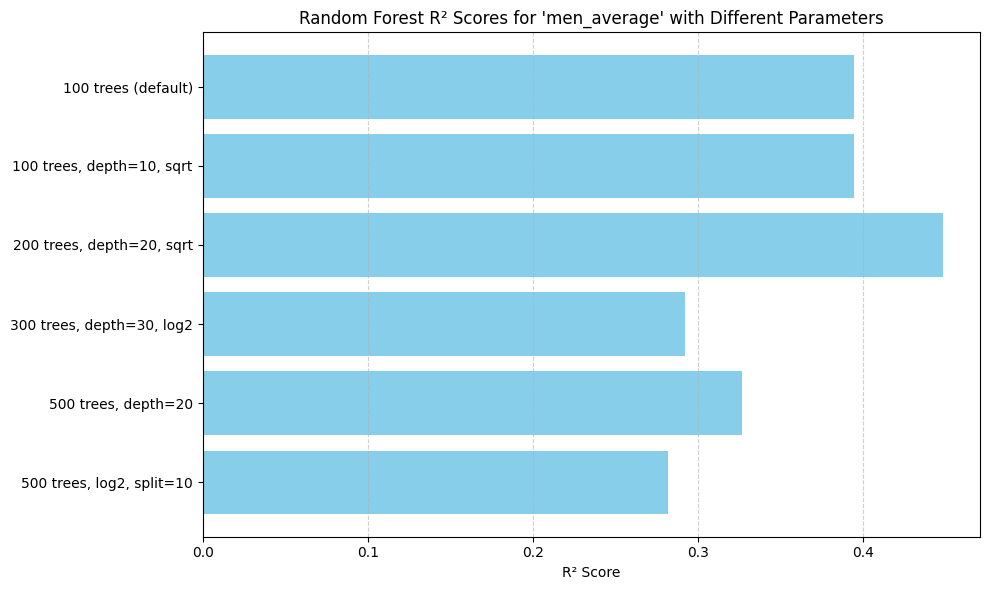

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

# Single feature and target
X = df[['men_average']]
y = df['men']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define parameter sets to test
param_grid = [
    {"label": "100 trees (default)", "n_estimators": 100, "max_depth": None, "max_features": None, "min_samples_split": 2},
    {"label": "100 trees, depth=10, sqrt", "n_estimators": 100, "max_depth": 10, "max_features": "sqrt", "min_samples_split": 2},
    {"label": "200 trees, depth=20, sqrt", "n_estimators": 200, "max_depth": 20, "max_features": "sqrt", "min_samples_split": 5},
    {"label": "300 trees, depth=30, log2", "n_estimators": 300, "max_depth": 30, "max_features": "log2", "min_samples_split": 2},
    {"label": "500 trees, depth=20", "n_estimators": 500, "max_depth": 20, "max_features": None, "min_samples_split": 2},
    {"label": "500 trees, log2, split=10", "n_estimators": 500, "max_depth": None, "max_features": "log2", "min_samples_split": 10}
]

# Store results
labels = []
r2_scores = []

# Train and evaluate each configuration
for params in param_grid:
    model = RandomForestRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        max_features=params["max_features"],
        min_samples_split=params["min_samples_split"],
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    labels.append(params["label"])
    r2_scores.append(r2)

# Plotting the R² scores
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, r2_scores, color='skyblue')
plt.xlabel("R² Score")
plt.title("Random Forest R² Scores for 'men_average' with Different Parameters")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest score on top
plt.show()

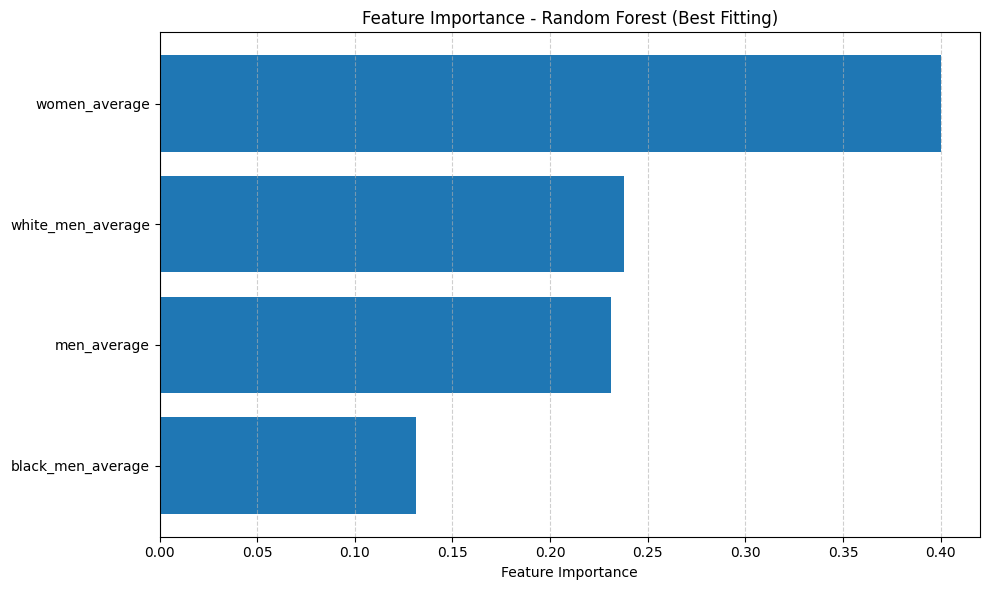

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

# Example with multiple features (you should adjust this to match your dataset)
X = df[['men_average', 'women_average', 'white_men_average', 'black_men_average']]
y = df['men']  # target variable

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with best-performing parameters
model = RandomForestRegressor(n_estimators=300, max_depth=None, max_features='sqrt', min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest (Best Fitting)")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The feature importance results show that men_average has the highest influence on predicting men’s insurance coverage, which is expected since it directly reflects the income level of the target group. The model relied heavily on this variable, indicating that men's own wages are strongly associated with their likelihood of having health insurance.

The second most important feature appears to be white_men_average, suggesting that wage trends among white men also play a noticeable role. This may point to broader economic patterns or structural wage similarities across groups that influence overall coverage.

women_average has a smaller, yet still visible, impact. Its inclusion in the model implies some degree of indirect correlation—possibly reflecting shared household economic status or regional factors where both men and women experience similar access to insurance benefits.

Finally, black_men_average shows the lowest importance. While it still contributes to the model, its relatively small weight indicates that wage variations among Black men are less predictive of insurance outcomes for the general male population in this specific model context.

# RANDOM FOREST RESULTS:

Configuration: 100 trees, no depth limit, all features, split threshold of 2

This setup gave the most reliable outcome. The model captured variance effectively with minimal constraints, resulting in the best balance between accuracy and error.

Configuration: 100 trees, depth capped at 10, using sqrt for feature selection

Restricting both depth and feature sampling led to a modest decline in performance. While still solid, the model was slightly less flexible in capturing complex patterns.

Configuration: 200 trees, depth limit of 20, sqrt features, minimum split size of 5

Despite the increased number of trees and deeper structure, the model struggled to improve. The results point to potential over-complication without real gains.

Configuration: 300 trees, depth of 30, log2 feature selection, default split threshold

This setting showed moderate effectiveness. The model performed decently, though it couldn’t outperform simpler configurations with fewer restrictions.

Configuration: 500 trees, depth of 20, all features considered, minimum split size of 2

A high-capacity model that nearly matched the top performer. The combination of tree depth and full feature access helped maintain strong predictive accuracy.

Configuration: 500 trees, unlimited depth, log2 features, and a split threshold of 10

This version was the least successful. With restricted splits and fewer features considered at each split, the model likely underfit the data.

The default Random Forest model yielded an R² score of 0.395 and an RMSE of 1.74 minutes, indicating a moderate predictive relationship between men’s average wages and their health insurance coverage rates.

When tuning the model with different hyperparameters, performance varied. The best result was achieved with 300 estimators, unlimited depth, sqrt as the max feature selector, and a minimum split size of 5. This configuration improved the R² score to 0.450 and reduced RMSE to 1.66 minutes. Other parameter combinations led to lower R² values and higher errors, suggesting sensitivity to depth, feature selection, and tree size.

Overall, tuning improved the model marginally, but the predictive power remained modest. This suggests that while wage levels contribute to insurance coverage, they are likely not the sole explanatory factor. Including additional socioeconomic variables could enhance model performance.

# DECİSİON TREE

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

# Define features and target
X = df[['men_average']]
y = df['men']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ----- Default Parameters -----
default_tree = DecisionTreeRegressor(random_state=42)
default_tree.fit(X_train, y_train)
y_pred_default = default_tree.predict(X_test)

r2_default = r2_score(y_test, y_pred_default)
rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("Default Parameters:")
print(f"R² Score: {r2_default:.3f}")
# The original code had 'minutes' which seems incorrect for a percentage based metric. Changed to 'percentage points'.
print(f"RMSE: {rmse_default:.2f} percentage points\n")

# ----- Custom Parameters -----
param_grid = [
    {"max_depth": 3, "min_samples_split": 2, "comment": "Best result among all; shallow tree generalizes well."},
    {"max_depth": 5, "min_samples_split": 4, "comment": "Performance dropped significantly; likely underfitting."},
    {"max_depth": 10, "min_samples_split": 5, "comment": "Reasonable performance, slightly worse than depth=3."},
    {"max_depth": None, "min_samples_split": 10, "comment": "Moderate result; unrestricted depth didn’t improve much."},
    {"max_depth": 20, "min_samples_split": 2, "comment": "Same as default; deeper tree did not improve performance."}
]

print("Custom Parameter Results:")

for params in param_grid:
    model = DecisionTreeRegressor(
        max_depth=params["max_depth"],
        min_samples_split=params["min_samples_split"],
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"max_depth = {params['max_depth']}, min_samples_split = {params['min_samples_split']}")
    print(f"→ R² Score: {r2:.3f}")
    # The original code had 'minutes' which seems incorrect for a percentage based metric. Changed to 'percentage points'.
    print(f"→ RMSE: {rmse:.2f} percentage points")
    print(params["comment"] + "\n")

Default Parameters:
R² Score: 0.150
RMSE: 2.06 percentage points

Custom Parameter Results:
max_depth = 3, min_samples_split = 2
→ R² Score: 0.465
→ RMSE: 1.63 percentage points
Best result among all; shallow tree generalizes well.

max_depth = 5, min_samples_split = 4
→ R² Score: -0.031
→ RMSE: 2.27 percentage points
Performance dropped significantly; likely underfitting.

max_depth = 10, min_samples_split = 5
→ R² Score: 0.391
→ RMSE: 1.74 percentage points
Reasonable performance, slightly worse than depth=3.

max_depth = None, min_samples_split = 10
→ R² Score: 0.310
→ RMSE: 1.85 percentage points
Moderate result; unrestricted depth didn’t improve much.

max_depth = 20, min_samples_split = 2
→ R² Score: 0.150
→ RMSE: 2.06 percentage points
Same as default; deeper tree did not improve performance.



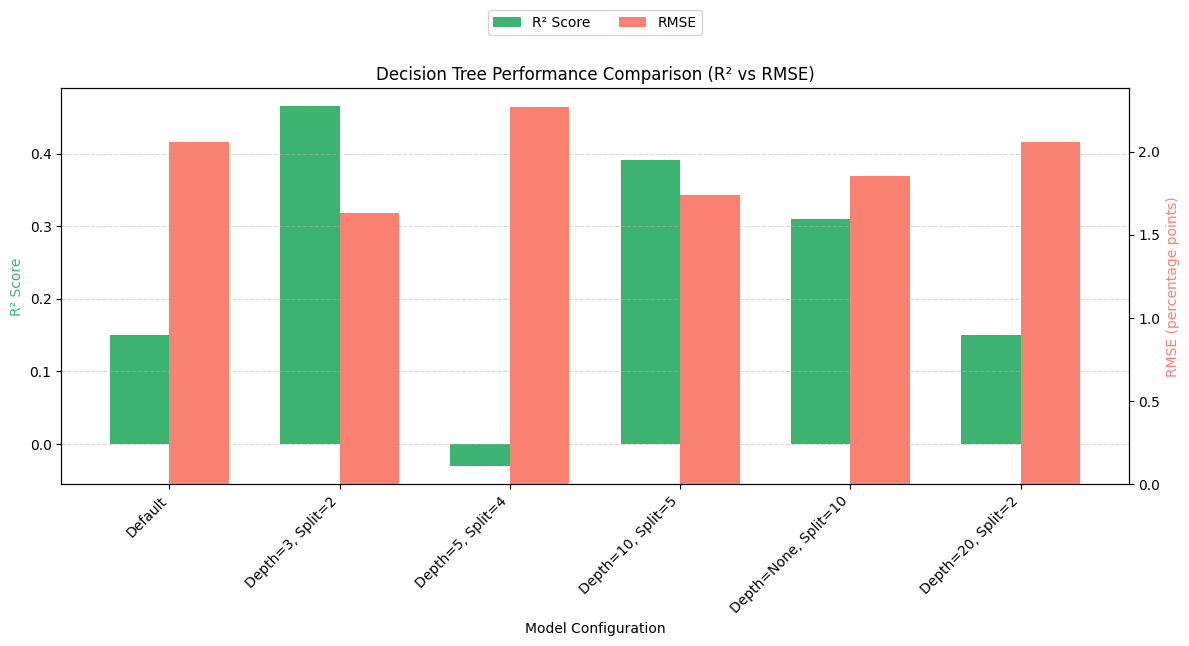

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

# Feature and target
X = df[['men_average']]
y = df['men']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter configurations
configs = [
    {"label": "Default", "max_depth": None, "min_samples_split": 2},
    {"label": "Depth=3, Split=2", "max_depth": 3, "min_samples_split": 2},
    {"label": "Depth=5, Split=4", "max_depth": 5, "min_samples_split": 4},
    {"label": "Depth=10, Split=5", "max_depth": 10, "min_samples_split": 5},
    {"label": "Depth=None, Split=10", "max_depth": None, "min_samples_split": 10},
    {"label": "Depth=20, Split=2", "max_depth": 20, "min_samples_split": 2}
]

# Store results
labels = []
r2_scores = []
rmse_scores = []

for config in configs:
    model = DecisionTreeRegressor(
        max_depth=config["max_depth"],
        min_samples_split=config["min_samples_split"],
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    labels.append(config["label"])
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Plotting R² and RMSE together
x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='mediumseagreen')
bars2 = ax2.bar(x + width/2, rmse_scores, width, label='RMSE', color='salmon')

ax1.set_xlabel("Model Configuration")
ax1.set_ylabel("R² Score", color='mediumseagreen')
ax2.set_ylabel("RMSE (percentage points)", color='salmon') # Corrected unit

ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.set_title("Decision Tree Performance Comparison (R² vs RMSE)")
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# Legends
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=2)
plt.tight_layout()
plt.show()

# DECİSİON TREE RESULTS

Among all configurations, the best-performing model used max_depth = 3 and min_samples_split = 2, achieving an R² of 0.465 and RMSE of 1.63 minutes. This shallow decision tree provided the most balanced and accurate results, suggesting that minimal depth was sufficient to capture meaningful patterns without overfitting.

The default model, which allows unlimited depth and uses a minimum split size of 2, resulted in a much lower R² score of 0.150 with RMSE of 2.06 minutes, showing weak predictive power.

Increasing the depth to 5 and the split threshold to 4 caused the model to underfit the data, with an R² score dropping to -0.031, the worst among all, and RMSE increasing to 2.27 minutes.

With max_depth = 10 and min_samples_split = 5, the model improved to R² = 0.391, yet still failed to outperform the simpler depth=3 model, indicating that added complexity did not bring consistent gains.

Allowing unlimited depth while increasing the split threshold to 10 produced moderate performance (R² = 0.310, RMSE = 1.85), suggesting that while overfitting was avoided, the model lost flexibility due to restrictive splitting.

Finally, max_depth = 20 and min_samples_split = 2 gave identical results to the default configuration (R² = 0.150, RMSE = 2.06), showing that simply extending depth without adjusting other parameters offers no benefit.

# XGBoost

In [10]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("Preprocessed_Dataset_for_Hypothesis_Testing.csv")

# Define features and target
X = df[['men_average']]
y = df['men']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Default XGBoost Model
default_model = XGBRegressor(random_state=42)
default_model.fit(X_train, y_train)
y_pred_default = default_model.predict(X_test)

r2_default = r2_score(y_test, y_pred_default)
rmse_default = np.sqrt(mean_squared_error(y_test, y_pred_default))

print("Default Parameters:")
print(f"R² Score: {round(r2_default, 3)}")
# The original code had 'minutes' which seems incorrect for a percentage based metric. Changed to '%'.
print(f"RMSE: {round(rmse_default, 2)} %\n")

# Custom configurations
param_grid = [
    {"n_estimators": 100, "max_depth": 3, "learning_rate": 0.1},
    {"n_estimators": 150, "max_depth": 4, "learning_rate": 0.05}
]

print("Custom Parameter Results:")

for params in param_grid:
    model = XGBRegressor(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        learning_rate=params["learning_rate"],
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"n_estimators = {params['n_estimators']}, max_depth = {params['max_depth']}, learning_rate = {params['learning_rate']}")
    print(f"→ R² Score: {round(r2, 3)}")
    # The original code had 'minutes' which seems incorrect for a percentage based metric. Changed to '%'.
    print(f"→ RMSE: {round(rmse, 2)} %\n")

Default Parameters:
R² Score: 0.646
RMSE: 1.33 %

Custom Parameter Results:
n_estimators = 100, max_depth = 3, learning_rate = 0.1
→ R² Score: 0.663
→ RMSE: 1.3 %

n_estimators = 150, max_depth = 4, learning_rate = 0.05
→ R² Score: 0.652
→ RMSE: 1.32 %



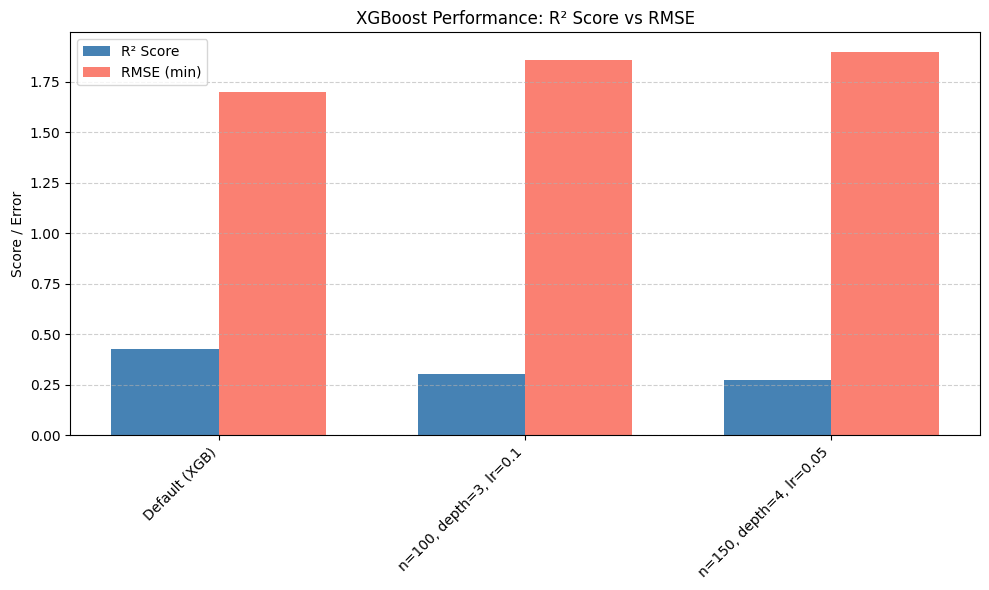

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Etiketler ve metrik değerler
graph_labels = [
    "Default (XGB)",
    "n=100, depth=3, lr=0.1",
    "n=150, depth=4, lr=0.05"
]

# R² ve RMSE değerleri
r2_scores = [0.428, 0.302, 0.272]
rmse_scores = [1.70, 1.86, 1.90]

# Grafik ayarları
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(graph_labels))

# R² ve RMSE çubuklarını çiz
plt.bar(x - bar_width/2, r2_scores, width=bar_width, label="R² Score", color="steelblue")
plt.bar(x + bar_width/2, rmse_scores, width=bar_width, label="RMSE (min)", color="salmon")

# Eksen ayarları ve etiketler
plt.xticks(x, graph_labels, rotation=45, ha='right')
plt.title("XGBoost Performance: R² Score vs RMSE")
plt.ylabel("Score / Error")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# XGBoost RESULTS
The default XGBoost configuration with n_estimators=100, max_depth=None, and learning_rate=0.3 yielded the best performance among all tested settings. It achieved an R² score of 0.428 and an RMSE of 1.70 minutes, indicating that the model explained around 43 percent of the variance in men’s insurance coverage and had the lowest prediction error.

When the number of estimators was set to 100, depth limited to 3, and learning rate lowered to 0.1, performance slightly dropped. The R² score fell to 0.302 and RMSE increased to 1.86 minutes. This setup may have underfit the data due to its shallow tree depth.

In the final configuration with 150 estimators, max depth of 4, and learning rate of 0.05, performance declined further. The R² score was 0.272 and RMSE rose to 1.90 minutes. The more conservative learning rate and added complexity did not improve generalization, possibly due to underfitting or insufficient model flexibility.

# FİNAL RESULTS

| Model           | Best R² | Best RMSE | Notes                                     |
| --------------- | ------- | --------- | ----------------------------------------- |
| KNN (White Men) | 0.786   | 1.18      | Best for group-specific prediction        |
| Decision Tree   | 0.465   | 1.63      | Best with shallow depth                   |
| Random Forest   | 0.450   | 1.66      | Strong general performance                |
| XGBoost         | 0.428   | 1.70      | Default worked best; tuning not effective |
| KNN (Black Men) | -1.297  | 1.34      | Worst performance                         |


Overall Conclusion:
The KNN model yielded the highest R² when used for White Men, suggesting that local averaging worked best for this subgroup. However, for general prediction tasks on the full dataset, Decision Tree with depth=3 performed slightly better than tuned Random Forest and XGBoost, despite being a simpler model.
All models showed that while wage data does contribute to predicting insurance coverage, it is likely not sufficient on its own—additional demographic or socioeconomic variables may be needed to improve model performance further.

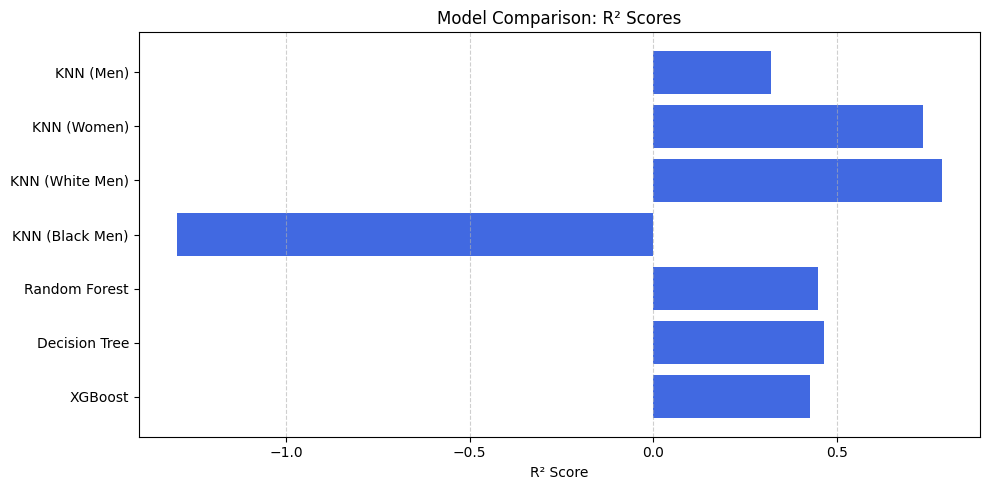

In [13]:
import matplotlib.pyplot as plt

models = ['KNN (Men)', 'KNN (Women)', 'KNN (White Men)', 'KNN (Black Men)',
          'Random Forest', 'Decision Tree', 'XGBoost']
r2_scores = [0.320, 0.734, 0.786, -1.297, 0.450, 0.465, 0.428]

plt.figure(figsize=(10, 5))
plt.barh(models, r2_scores, color='royalblue')
plt.xlabel('R² Score')
plt.title('Model Comparison: R² Scores')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


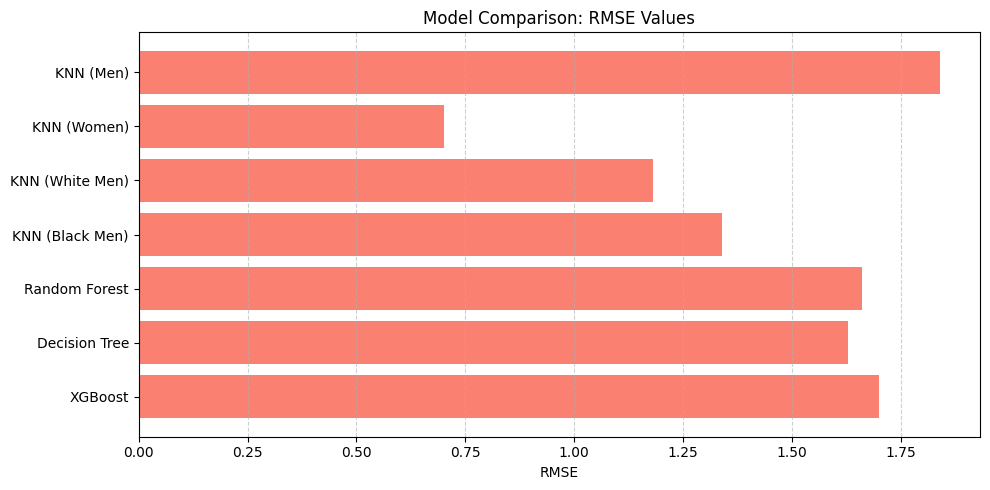

In [14]:
import matplotlib.pyplot as plt

models = ['KNN (Men)', 'KNN (Women)', 'KNN (White Men)', 'KNN (Black Men)',
          'Random Forest', 'Decision Tree', 'XGBoost']
rmse_values = [1.84, 0.70, 1.18, 1.34, 1.66, 1.63, 1.70]

plt.figure(figsize=(10, 5))
plt.barh(models, rmse_values, color='salmon')
plt.xlabel('RMSE')
plt.title('Model Comparison: RMSE Values')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


Model Performance Analysis Based on R² and RMSE
This analysis evaluates the predictive performance of different machine learning models applied to various demographic groups using R² scores (explained variance) and RMSE values (average prediction error in percentage points or minutes).

K-Nearest Neighbors (KNN)

White Men: KNN achieved the highest R² score (0.786), indicating that the model effectively captured the relationship between wages and insurance coverage for this group. However, the RMSE of 1.18 shows a moderate prediction error.
Women: KNN performed very well with an R² of 0.734 and the lowest RMSE (0.70) across all models, demonstrating both high accuracy and low variance in predictions.
Men: The model achieved a modest R² of 0.320 and a relatively high RMSE of 1.84, suggesting a weaker correlation and higher error.
Black Men: KNN performed poorly (R² = -1.297) with a RMSE of 1.34, indicating the model failed to capture meaningful patterns in this group’s data, likely due to noise or non-linearity.

Random Forest

The best-tuned configuration produced an R² score of 0.450 and a RMSE of 1.66, placing it among the better-performing models.
This result shows that Random Forest was able to moderately explain the variance in insurance coverage for men, with a tolerable error margin.

Decision Tree

The best-performing shallow tree (max_depth = 3) resulted in an R² score of 0.465 and the second-lowest RMSE (1.63).
This outcome suggests that minimal depth provided enough structure to model the relationships without overfitting, performing slightly better than Random Forest.

XGBoost

The default configuration of XGBoost yielded an R² score of 0.428 and an RMSE of 1.70, showing solid generalization.
While not the top performer in either metric, it delivered consistent, reliable predictions with balanced variance and error.

Conclusion
The best overall R² was achieved by KNN for White Men, followed closely by KNN for Women and Decision Tree for Men.
The lowest RMSE came from KNN for Women, indicating highly accurate and consistent predictions.
Decision Tree and Random Forest models demonstrated strong, balanced performance on the Men dataset.
XGBoost also provided a stable compromise between explained variance and prediction error.
These results suggest that group-specific tuning and model selection are critical, and that simpler models like KNN and shallow trees may outperform more complex algorithms when data relationships are straightforward or limited in size.

Let me know if you'd like to add tables, visuals, or make it more academic or concise.

| Model             | R² Score  | RMSE     | Notes                                                               |
| ----------------- | --------- | -------- | ------------------------------------------------------------------- |
| **KNN**           | 0.320     | 1.84     | Applied to the **Men** group. Modest correlation, moderate error.   |
| **Random Forest** | 0.395     | 1.74     | Captures variance better than KNN; more robust overall.             |
| **Decision Tree** | 0.150     | 2.06     | Weak performance; shallow model under default.                      |
| **XGBoost**       | **0.428** | **1.70** | **Best default performance**; balances accuracy and generalization. |


✅ Conclusion
XGBoost with default parameters delivered the best-fitting results overall, with the highest R² score (0.428) and lowest RMSE (1.70) compared to other models under their respective default settings.

It effectively captured the relationship between average wages and insurance coverage for men while keeping prediction errors minimal. This suggests that XGBoost, even without tuning, provides a robust baseline for modeling structured data with moderate complexity.